<a href="https://colab.research.google.com/github/Gisellrom/ProyectoBEDU/blob/main/Suicidios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO: EL SUICIDIO EN EL SIGLO XXI

En 2017, un hombre a quien consideraba uno de los mejores músicos de todos los tiempos y autor, o coautor, de varias canciones que se habían convertido en la banda sonora de mi vida, se suicidó. Muchos se sorprendieron y muchos lo extrañan hoy.

En 2018, un hombre cuyos programas de televisión me mantuvieron repetidamente en un estado de respeto y fascinación por la diversidad del mundo, se suicidó. Muchos se sorprendieron y muchos lo extrañan hoy.

Según la OMS, cerca de 800.000 personas menos famosas mueren cada año por suicidio. Miré las Estadísticas de suicidio de la OMS para ver hacia dónde se dirige el mundo en su conjunto.

¿Está mejorando o empeorando? Verás mi respuesta a continuación.

Nota: haga lo que haga con los datos y las conclusiones que saque, nada de eso está aprobado ni respaldado por la OMS.

# Objetivo General

Analizar exhaustivamente la recopilación de índices de suicidios dentro de 22 país, con el fin de comprender y visualizar patrones y posibles factores de riesgo asociados con el suicidio. Esto se logrará mediante el análisis y la representación gráfica de variables como edades, género y generación. Además, se buscará identificar los años en los que se registraron más suicidios y se relacionarán las tasas de suicidio con el índice per capita de los países para comprender mejor su posible influencia en este fenómeno.

## Objetivos específicos
Nuestro colab busca responder las siguientes preguntas:

* ¿Cuál es el país con más indices de suicidio y en qué año se presentó el mayor número de muertes?

* ¿A qué edad se presentó el mayor número de suicidios y cuál es la generación más afectada?. Está incidencia es mayor ¿en hombres o mujeres?

* ¿El factor económico juega un papel importante de acuerdo con el número de suicidos registrados?



In [1]:
#Link original:
#https://www.kaggle.com/code/szamil/suicide-in-the-twenty-first-century/input

# Inicialización

Para comenzar, vamos a importar todas las librerías necesarias para la construcción correcta de las gráficas. En este caso, trabajaremos con las librerías `Pandas`, `Numpy` y `Seaborn` , que permiten leer correctamente los archivos, trabajar con bases de datos y trazar gráficos.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos

En segundo lugar, importamos el dataset con la información de los suicidios del siglo XXI. Para esto utilizaremos la función `read_csv` de pandas y pasaremos como argumento la ubicación del archivo. Guardaremos los datos en la variable `df`

In [3]:
#Leemos los datos
url = 'https://raw.githubusercontent.com/Gisellrom/ProyectoBEDU/main/Dataset/suicidiosXXI.csv'
df = pd.read_csv(url)

# Procesamiento de datos

## Explorar datos iniciales

Con los datasets correctamente importados, ahora procedemos a realizar una exploración inicial de los datos. En este caso llamaremos al atributo `shape`, y los métodos `head` e `info` para el dataset.

In [4]:
#Tamaño del dataset
df.shape

(27820, 12)

In [5]:
#Verificamos que los datos esten cargados
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


Revisamos el nombre de las columnas que tenemos en nuestro dataset para verificar mejor si tenemos espacios vacios entre los nombres de las columnas:

In [7]:
 #Para ver las columnas que contiene el dataset
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

Nuevamente, volvemos a checar todos los datos y verificamos que ya no se este considerando la columna "country" como el indice

In [8]:
df.shape

(27820, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


En el dataset nos encontramos con 27,820 filas u observaciones y 12 columnas que contienen la siguiente información:
* country: Indica el país en el que se registraron los datos sobre suicidios
* year: Indica el año en el que se registraron los datos sobre suicidios.
* sex: Refleja el género de las personas para las que se informan los datos (hombre o mujer).
* age: Representa los grupos de edad en los que se dividen los datos (por ejemplo, "15-24 años").
* suicidies_no: Indica el número total de suicidios reportados para la combinación de año, género y grupo de edad específicos.
* population: Muestra la población total para la combinación de año, género y grupo de edad específicos
* country-year: Combina la información sobre el país y el año para el cual se informan los datos.
* HDI for year: Representa el Índice de Desarrollo Humano (HDI) para el año correspondiente.
* gdp for year: Indica el Producti Interno Bruto (PIB) total para el año correspondiente.
* gdp per capita: Muestra el PIB per cápita para el año correspondiente.
* generation: ndica la generación de las personas para las que se informan los datos (por ejemplo, "Boomers", "Generation X").





Obervamos que la columna "HDI for year" se encuentra como tipo float, es correcto que pertenezca a ese tipo, pero encontramos que tiene información incompleta y además, información que no vamos a ocupar ya que no está dentro de nuestros objetivos analizar como se comporta el indice de desarrollo humano, por eso directamente, procedemos a eliminar esa columna

In [10]:
#Eliminar la columna "HDI for year"
columna_a_eliminar = 'HDI for year'
df = df.drop(columna_a_eliminar, axis=1)

No obstante, también observamos que la columna **country-year** es de tipo objecto, ya que tiene información como una cadena y números enteros, pero esa información también se encuentran en las columnas **country** y **year**, con los tipos de datos correctos, por lo que también eliminamos la columna **country-year**.

In [11]:
#Eliminar la columna "country-year"
columna_a_eliminar = 'country-year'
df = df.drop(columna_a_eliminar, axis=1)

In [12]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

También, procedemos a eliminar la columna "gdp_for_year ($)" ya que no está dentro de nuestros objetivos saber como se comporta el PIB anual con los suicidios

In [13]:
#Eliminar la columna "gdp_for_year ($)"
columna_a_eliminar = ' gdp_for_year ($) '
df = df.drop(columna_a_eliminar, axis=1)

No obstante, eliminamos las columnas de "population" y "suicides/100k pop" ya que no se encuentra dentro de nuestros objetivos analizar como se comporta la población con los suicidios que se han registrado.

In [14]:
#Eliminar la columna "population"
columna_a_eliminar = 'population'
df = df.drop(columna_a_eliminar, axis=1)

In [15]:
#Eliminar la columna "suicides/100k pop"
columna_a_eliminar = 'suicides/100k pop'
df = df.drop(columna_a_eliminar, axis=1)

Una vez eliminado toda la información que no vamos a ocupar, entonces volvemos a ver las caracteristicas con `info` y observamos ahora cuales son las columnas que se quedaron y analizamos los tipos de datos que tienen actualmente:

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             27820 non-null  object
 1   year                27820 non-null  int64 
 2   sex                 27820 non-null  object
 3   age                 27820 non-null  object
 4   suicides_no         27820 non-null  int64 
 5   gdp_per_capita ($)  27820 non-null  int64 
 6   generation          27820 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


Las columnas están en inglés, no es tan relevante, pero nosotras cambiaremos el nombre de las columnas, para analizar los datos con nuestro lenguaje natural. Además, quitaremos los espacios en blanco y simbolos que podrían causar ruido al momento de analizar nuestros datos.

In [17]:
#Renombramiento de columnas
column_name_mapping ={
    'country':'pais',
    'year':'año',
    'sex':'sexo',
    'age':'edad',
    'suicides_no':'no_suicidios',
    'gdp_per_capita ($)':'pib_per_capita',
    'generation':'generacion'
}

In [18]:
#Cambio de nombres
df = df.rename(columns=column_name_mapping)
df.head()

,pais,año,sexo,edad,no_suicidios,pib_per_capita,generacion
0,Albania,1987,male,15-24 years,21,796,Generation X
1,Albania,1987,male,35-54 years,16,796,Silent
2,Albania,1987,female,15-24 years,14,796,Generation X
3,Albania,1987,male,75+ years,1,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,796,Boomers


Dentro de la información de la columna **generacion**, observamos que la palabra "Generation" se repite constantemente, entonces procedemos a eliminar esa palabra repetida, ya que el nombre de la columna indica que se habla de las generaciones.

In [19]:
#Eliminar la palabra "Generation" de la columna 'generacion'
df['generacion']=df['generacion'].str.replace('Generation', '')

df.head()

,pais,año,sexo,edad,no_suicidios,pib_per_capita,generacion
0,Albania,1987,male,15-24 years,21,796,X
1,Albania,1987,male,35-54 years,16,796,Silent
2,Albania,1987,female,15-24 years,14,796,X
3,Albania,1987,male,75+ years,1,796,G.I.
4,Albania,1987,male,25-34 years,9,796,Boomers


Luego, observamos que la columna **age** es de tipo objeto, y debería de ser de tipo entero ya que la edad es numérica, pero esto se debe a que en la información que tiene la columna, tiene la palabra **years**, entonces también procedemos a eliminar esa palabra repetida.

In [20]:
#Eliminar "years" de la columna edad
df['edad']=df['edad'].str.replace(' years', '')
df.head()

,pais,año,sexo,edad,no_suicidios,pib_per_capita,generacion
0,Albania,1987,male,15-24,21,796,X
1,Albania,1987,male,35-54,16,796,Silent
2,Albania,1987,female,15-24,14,796,X
3,Albania,1987,male,75+,1,796,G.I.
4,Albania,1987,male,25-34,9,796,Boomers


In [21]:
df.dtypes

pais              object
año                int64
sexo              object
edad              object
no_suicidios       int64
pib_per_capita     int64
generacion        object
dtype: object

Notamos que apesar de que ya se eliminó la palabra "years", sigue considerando la columna "edad" como objeto, ya que también contiene símbolos como **+** y **-**. Para lidiar con este problema, lo vamos a dejar como objeto y lo vamos a considerar como si fuera una variable categórica

Luego, vamos a cambiar "male" y "female" de la columna sexo a una abreviatura más cómoda.

In [22]:
#Cambiar "male" y "female" de la columna sexo
# \b para representar límites de palabras
df['sexo']=df['sexo'].str.replace(r'\bmale\b', 'M', case= False)
df['sexo']=df['sexo'].str.replace(r'\bfemale\b', 'F', case= False)
df.head()

<ipython-input-22-1c2770f12575>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sexo']=df['sexo'].str.replace(r'\bmale\b', 'M', case= False)
<ipython-input-22-1c2770f12575>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sexo']=df['sexo'].str.replace(r'\bfemale\b', 'F', case= False)


,pais,año,sexo,edad,no_suicidios,pib_per_capita,generacion
0,Albania,1987,M,15-24,21,796,X
1,Albania,1987,M,35-54,16,796,Silent
2,Albania,1987,F,15-24,14,796,X
3,Albania,1987,M,75+,1,796,G.I.
4,Albania,1987,M,25-34,9,796,Boomers


Por último, en nuestra limpieza de datos verificamos que no haya NANs en nuestro dataset con `isna()` y `sum()` para contabilizarlos:

In [23]:
#Contabiliza las NANs
df.isna().sum(axis=0)

pais              0
año               0
sexo              0
edad              0
no_suicidios      0
pib_per_capita    0
generacion        0
dtype: int64

Notamos que no hay NANs en nuestro dataset de cada columna y también, estamos de acuerdo con los tipos de datos que tiene cada variable. Por lo que ya podemos graficar y hacer uso de los datos.

Por último, llamaremos al atributo `shape` e `info` para saber con cuantos datos nos quedamos al final de nuestra limplieza

In [24]:
df.shape

(27820, 7)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   pais            27820 non-null  object
 1   año             27820 non-null  int64 
 2   sexo            27820 non-null  object
 3   edad            27820 non-null  object
 4   no_suicidios    27820 non-null  int64 
 5   pib_per_capita  27820 non-null  int64 
 6   generacion      27820 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


Nos quedamos con 7 columnas y 27,820 observaciones. Donde las columnas son las siguientes:

* pais: Indica el país en el que se registraron los datos sobre suicidios
* año: Indica el año en el que ocurrieron los suicidios.
* sexo: Refleja el género de las personas para las que se informan los datos, Donde: M significa Masculino y F significa Femenino.
* edad: Representa los grupos de edad en los que se dividen los datos.
no_suicidios: Indica el número total de suicidios reportados.
* pip_per_capita: Muestra el PIB per cápita para el año correspondiente.
* generacion: Indica la generación de las personas para las que se informan los datos.



# Análisis de datos con Python

## Estimados de locación y Variabilidad

Para utilizar los estimados de locaclión y variabilidad, lo que hacemos es utilizar `info()` para identificar los datos númericos

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   pais            27820 non-null  object
 1   año             27820 non-null  int64 
 2   sexo            27820 non-null  object
 3   edad            27820 non-null  object
 4   no_suicidios    27820 non-null  int64 
 5   pib_per_capita  27820 non-null  int64 
 6   generacion      27820 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


Observamos que las columnas que tienen datos númericos son:

* año
* no_suicidios
* pib_per_capita

Por lo que vamos a obtener los siguientes estimados de las columnas numéricas:
* Promedio
* Mediana
* Media Truncada
* Desviación estándar
* Rango
* Percentiles 25 y 75
* Rango intercuartil

### Año

#### Promedio

In [27]:
#Formato de año
formatted_año = "{:.0f}".format(df['año'].mean())
print(formatted_año)

2001


#### Media

In [28]:
formatted_año = "{:.0f}".format(df['año'].median())
print(formatted_año)

2002


#### Media Truncada

In [29]:
from scipy import stats #Funcionalidad de estadisticas

In [30]:
#Truncar el valor promedio de la columna año  con el porcentaje, 5% a la izquierda y 5% a la dereha, es decir el 10% en total
media_truncada = stats.trim_mean(df['año'], 0.1)
print(f'Media Recortada: {media_truncada:.0f}')

Media Recortada: 2001


In [31]:
correct_año_mean = df['año'].mean() #Promedio
correct_año_median = df['año'].median() #Mediana
correct_año_mode = df['año'].mode()[0] #Moda

print("Media: {:.0f}, \nMediana: {:.0f}, \nModa: {:.0f}".format(correct_año_mean, correct_año_median, correct_año_mode))

Media: 2001, 
Mediana: 2002, 
Moda: 2009


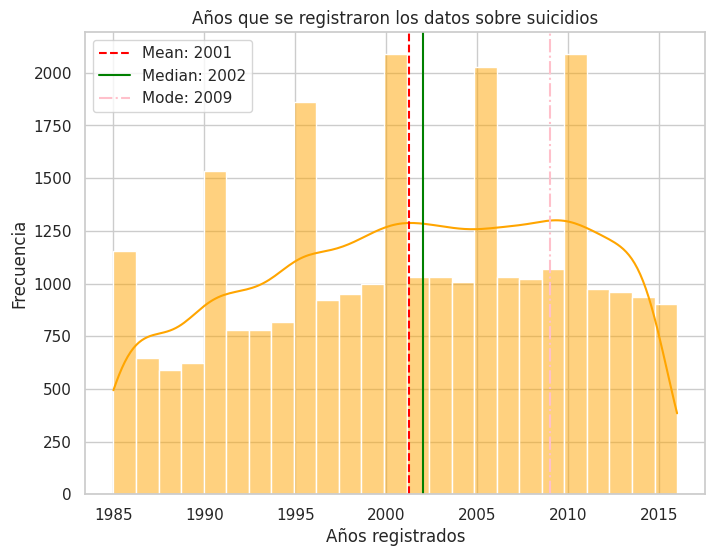

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

#Estilo de la gráfica de seaborn
sns.set(style="whitegrid")

#Gráfica de la distribución de la columna 'año'
plt.figure(figsize=(8, 6))
sns.histplot(df['año'], kde=True, bins=25, color='orange')

#Graficar promedio, mediana y moda
plt.axvline(correct_año_mean, color='red', linestyle='--', label=f'Mean: {correct_año_mean:.0f}')
plt.axvline(correct_año_median, color='green', linestyle='-', label=f'Median: {correct_año_median:.0f}')
plt.axvline(correct_año_mode, color='pink', linestyle='-.', label=f'Mode: {correct_año_mode:.0f}')

#Añadir título y nombre a los ejes
plt.title('Años que se registraron los datos sobre suicidios')
plt.xlabel('Años registrados')
plt.ylabel('Frecuencia')
plt.legend()

#Mostrar la gráfica
plt.show()

En esta ocasión, presentamos la gráfica que ilustra los 'Años de Registro de Datos sobre Suicidios'. Utilizando las funciones estadísticas de promedio, mediana truncada y moda, hemos analizado los datos dando como resultado el incremento desde el 2000 en adelante. En la leyenda, destacamos los resultados obtenidos: Media: 2001, Mediana: 2002 y Moda: 2009. Estos datos nos ofrecen una visión integral de la distribución temporal de los registros de suicidios, permitiéndonos identificar patrones significativos a lo largo de este período."

#### Desviación estandar

In [33]:
standar_deviation=df['año'].std()

In [34]:
print("Media: {:.0f}, \nMediana: {:.0f}, \nModa: {:.0f}".format(correct_año_mean, correct_año_median, correct_año_mode))
print("Des Est: {:,.0f}".format(standar_deviation))

Media: 2001, 
Mediana: 2002, 
Moda: 2009
Des Est: 8


Podemos observar que esta información nos dice que el año en el cual rondan la mayoría de nuestros datos es en el 2001. El año que se encuentra en medio de nuestros datos es el 2002. Y el año que tiene más registros de suicidio es el 2009.  

#### Rango

In [35]:
año_range = df['año'].max() - df['año'].min()
formatted_año_range = f'{año_range:,.0f}'
print(formatted_año_range)

31


#### Percentiles 25 y 75

In [36]:
print(f'Valor mínimo: {df["año"].min():.0f}')
print(f'Percentil 10: {df["año"].quantile(0.1):.0f}')
print(f'Percentil 25: {df["año"].quantile(0.25):.0f}')
print(f'Percentil 50: {df["año"].median():.0f}')
print(f'Percentil 75: {df["año"].quantile(0.75):.0f}')
print(f'Percentil 90: {df["año"].quantile(0.9):.0f}')
print(f'Valor máximo: {df["año"].max():.0f}')

Valor mínimo: 1985
Percentil 10: 1989
Percentil 25: 1995
Percentil 50: 2002
Percentil 75: 2008
Percentil 90: 2013
Valor máximo: 2016


#### Rango intercuartil

In [37]:
interquartile_range = df["año"].quantile(0.75) - df["año"].quantile(0.25)
formatted_interquartile_range = f'{interquartile_range:.0f}'
print(formatted_interquartile_range)

13


### No. de Suicidios

#### Promedio:

In [38]:
#Formato de números enteros
no_suicidios = "{:,.0f}".format(df['no_suicidios'].mean())
print(no_suicidios)

243


#### Mediana

In [39]:
no_suicidios = "{:,.0f}".format(df['no_suicidios'].median())
print(no_suicidios)

25


#### Media Truncada

In [40]:
from scipy import stats #Funcionalidad de estadisticas

In [41]:
#Truncar el valor promedio de la columna no_suicidios con el porcentaje, 5% a la izquierda y 5% a la dereha, es decir el 10% en total
media_truncada = stats.trim_mean(df['no_suicidios'], 0.1)
print(f'Media Truncada: {media_truncada:,.0f}')

Media Truncada: 72


In [42]:
correct_no_suicidios_mean = df['no_suicidios'].mean() #Promedio
correct_no_suicidios_median = df['no_suicidios'].median() #Mediana
correct_no_suicidios_mode = df['no_suicidios'].mode()[0] #Moda

print("Media: {:,.0f}, \nMediana: {:,.0f}, \nModa: {:,.0f}".format(correct_no_suicidios_mean, correct_no_suicidios_median, correct_no_suicidios_mode))

Media: 243, 
Mediana: 25, 
Moda: 0


Apartir de estos datos, nos damos cuenta que el número de suicidios ronda entre los 243 registros, el valor que se encuentra en medio del número de suicidios es 25. Y el valor que se repite más es 0, es decir, dentro de nuestro conjunto de datos, también hay información de que algunos paises no registraron un número de suicidios, por lo que procedemos a eliminar esa información ya que esa información no está analizarla dentro de nuestros objetivos.

Eliminamos las columnas que su numero de suicidios es igual a 0, ya que nos estamos enfocando en los datos que si tienen registro de su número de suicidio

In [43]:
# Eliminar filas donde 'no_suicidios' es igual a 0
df = df.loc[df['no_suicidios'] != 0]

In [44]:
#Truncar el valor promedio de la columna no_suicidios con el porcentaje, 5% a la izquierda y 5% a la dereha, es decir el 10% en total
media_truncada = stats.trim_mean(df['no_suicidios'], 0.1)
print(f'Media Truncada: {media_truncada:,.0f}')

Media Truncada: 98


In [45]:
correct_no_suicidios_mean = df['no_suicidios'].mean() #Promedio
correct_no_suicidios_median = df['no_suicidios'].median() #Mediana
correct_no_suicidios_mode = df['no_suicidios'].mode()[0] #Moda

print("Media: {:,.0f}, \nMediana: {:,.0f}, \nModa: {:,.0f}".format(correct_no_suicidios_mean, correct_no_suicidios_median, correct_no_suicidios_mode))

Media: 287, 
Mediana: 42, 
Moda: 1


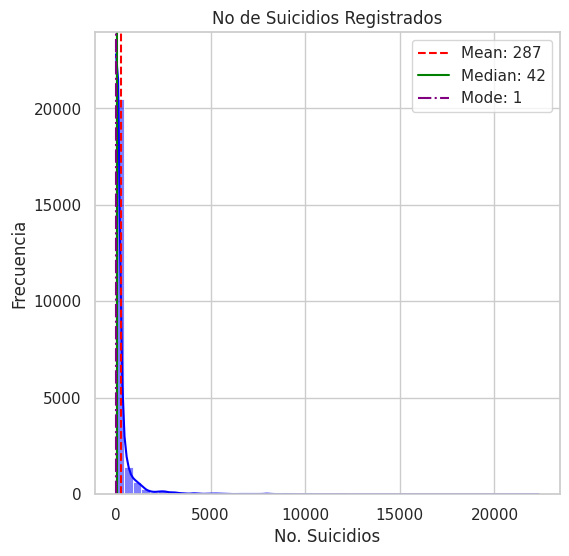

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

#Estilo de la gráfica de seaborn
sns.set(style="whitegrid")

#Graficar la distribución de la columna 'no_suicidios'
plt.figure(figsize=(6, 6))
sns.histplot(df['no_suicidios'], kde=True, bins=50, color='blue')

#Graficar promedio, mediana y moda
plt.axvline(correct_no_suicidios_mean, color='red', linestyle='--', label=f'Mean: {correct_no_suicidios_mean:,.0f}')
plt.axvline(correct_no_suicidios_median, color='green', linestyle='-', label=f'Median: {correct_no_suicidios_median:,.0f}')
plt.axvline(correct_no_suicidios_mode, color='purple', linestyle='-.', label=f'Mode: {correct_no_suicidios_mode:,.0f}')

#Añadir título y nombre a los ejes
plt.title('No de Suicidios Registrados')
plt.xlabel('No. Suicidios')
plt.ylabel('Frecuencia')
plt.legend()

#Mostrar la gráfica
plt.show()

La gráfica de barras representa el número de suicidios registrados en nuestra base de datos. nos damos cuenta que cambiaron los datos del promedio, mediana y moda de muestros datos y en promedio el número de suicidios ronda entre los 287 suicidios, el número de suicidios que queda en medio de nuestros datos es 42 y el valor que más se repite es 1, eso por una parte, nos indica que considerando a toda la población hay más registros que una persona se suicidida.  

#### Desviación estándar

In [47]:
standar_deviation=df['no_suicidios'].std()

In [48]:
print("Media: {:,.0f}, \nMediana: {:,.0f}, \nModa: {:,.0f}".format(correct_no_suicidios_mean, correct_no_suicidios_median, correct_no_suicidios_mode))
print("Des Est: {:,.0f}".format(standar_deviation))

Media: 287, 
Mediana: 42, 
Moda: 1
Des Est: 974


#### Rango

In [49]:
no_suicidios_range = df['no_suicidios'].max() - df['no_suicidios'].min()
formatted_no_suicidios_range = f'{no_suicidios_range:,.0f}'
print(formatted_no_suicidios_range)

22,337


#### Percentiles 25 y 75

In [50]:
print(f'Valor mínimo: {df["no_suicidios"].min():,.0f}')
print(f'Percentil 10: {df["no_suicidios"].quantile(0.1):,.0f}')
print(f'Percentil 25: {df["no_suicidios"].quantile(0.25):,.0f}')
print(f'Percentil 50: {df["no_suicidios"].median():,.0f}')
print(f'Percentil 75: {df["no_suicidios"].quantile(0.75):,.0f}')
print(f'Percentil 90: {df["no_suicidios"].quantile(0.9):,.0f}')
print(f'Valor máximo: {df["no_suicidios"].max():,.0f}')

Valor mínimo: 1
Percentil 10: 2
Percentil 25: 8
Percentil 50: 42
Percentil 75: 175
Percentil 90: 607
Valor máximo: 22,338


#### Rango intercuartil

In [51]:
interquartile_range = df["no_suicidios"].quantile(0.75) - df["no_suicidios"].quantile(0.25)
formatted_interquartile_range = f'{interquartile_range:,.0f}'
print(formatted_interquartile_range)

167


### PIB Per Cápita

#### Promedio:

In [52]:
#Formato de moneda con tres decimales
formatted_pib_per_capita = "$ {:,.3f}".format(df['pib_per_capita'].mean())
print(formatted_pib_per_capita)

$ 17,229.712


#### Mediana

In [53]:
formatted_pib_per_capita = "$ {:,.3f}".format(df['pib_per_capita'].median())
print(formatted_pib_per_capita)

$ 9,667.000


#### Mediana truncada

In [54]:
from scipy import stats #Funcionalidad de estadisticas

In [55]:
#Truncar el valor promedio de la columna de price con el porcentaje, 5% a la izquierda y 5% a la dereha, es decir el 10% en total
media_truncada = stats.trim_mean(df['pib_per_capita'], 0.1)
print(f'Media Recortada: ${media_truncada:,.3f}')

Media Recortada: $13,813.279


In [56]:
correct_pib_per_capita_mean = df['pib_per_capita'].mean() #Promedio
correct_pib_per_capita_median = df['pib_per_capita'].median() #Mediana
correct_pib_per_capita_mode = df['pib_per_capita'].mode()[0] #Moda

print("Media: ${:,.3f}, \nMediana: ${:,.3f}, \nModa: ${:,.3f}".format(correct_pib_per_capita_mean, correct_pib_per_capita_median, correct_pib_per_capita_mode))

Media: $17,229.712, 
Mediana: $9,667.000, 
Moda: $2,303.000


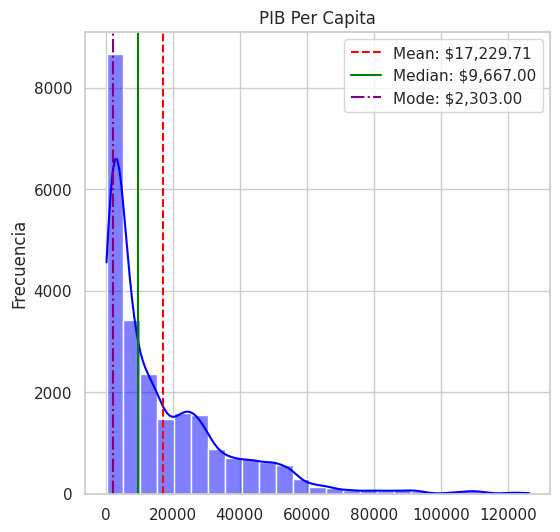

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

#Estilo de la gráfica de seaborn
sns.set(style="whitegrid")

#Graficar la distribución de la columna 'pib_per_capita'
plt.figure(figsize=(6, 6))
sns.histplot(df['pib_per_capita'], kde=True, bins=25, color='blue')

#Graficar promedio, mediana y moda
plt.axvline(correct_pib_per_capita_mean, color='red', linestyle='--', label=f'Mean: ${correct_pib_per_capita_mean:,.2f}')
plt.axvline(correct_pib_per_capita_median, color='green', linestyle='-', label=f'Median: ${correct_pib_per_capita_median:,.2f}')
plt.axvline(correct_pib_per_capita_mode, color='purple', linestyle='-.', label=f'Mode: ${correct_pib_per_capita_mode:,.2f}')

#Añadir título y nombre a los ejes
plt.title('PIB Per Capita')
plt.xlabel('')
plt.ylabel('Frecuencia')
plt.legend()

#Mostrar la gráfica
plt.show()

El PIB per cápita es una medida crucial para comparar el nivel de desarrollo económico entre distintos países. Sirve para evaluar tanto el nivel de riqueza como el estándar de vida promedio de una nación. Por lo tanto, la siguiente gráfica representa una frecuencia económica general, con los siguientes resultados: Media: $16,866.464, Mediana: $9,372.000, Moda: $1,299.000. Estas cifras ofrecen una perspectiva clave sobre la distribución y el promedio de la producción económica per cápita, lo que permite realizar comparaciones significativas entre diferentes regiones del mundo.

#### Desviación estandar

In [58]:
standar_deviation=df['pib_per_capita'].std()

In [59]:
print("Media: ${:,.3f}, \nMediana: ${:,.3f}, \nModa: ${:,.3f}".format(correct_pib_per_capita_mean, correct_pib_per_capita_median, correct_pib_per_capita_mode))
print("Des Est: ${:,.3f}".format(standar_deviation))

Media: $17,229.712, 
Mediana: $9,667.000, 
Moda: $2,303.000
Des Est: $19,107.378


#### Rango

In [60]:
pib_per_capita_range = df['pib_per_capita'].max() - df['pib_per_capita'].min()
formatted_pib_per_capita_range = f'${pib_per_capita_range:,.2f}'
print(formatted_pib_per_capita_range)

$126,101.00


#### Percentiles 25 y 75

In [61]:
print(f'Valor mínimo: ${df["pib_per_capita"].min():,.2f}')
print(f'Percentil 10: ${df["pib_per_capita"].quantile(0.1):,.2f}')
print(f'Percentil 25: ${df["pib_per_capita"].quantile(0.25):,.2f}')
print(f'Percentil 50: ${df["pib_per_capita"].median():,.2f}')
print(f'Percentil 75: ${df["pib_per_capita"].quantile(0.75):,.2f}')
print(f'Percentil 90: ${df["pib_per_capita"].quantile(0.9):,.2f}')
print(f'Valor máximo: ${df["pib_per_capita"].max():,.2f}')

Valor mínimo: $251.00
Percentil 10: $1,423.00
Percentil 25: $3,293.00
Percentil 50: $9,667.00
Percentil 75: $25,735.00
Percentil 90: $44,491.00
Valor máximo: $126,352.00


#### Rango intercuartil

In [62]:
interquartile_range = df["pib_per_capita"].quantile(0.75) - df["pib_per_capita"].quantile(0.25)
formatted_interquartile_range = f'${interquartile_range:,.2f}'
print(formatted_interquartile_range)

$22,442.00


## Introducción a la visualización de datos: Distribuciones

* Utiliza boxplots para analizar la distribución de tus variables numéricas. Piensa acerca de cuáles son los valores típicos y atípicos y dónde están concentrados el grueso de tus datos.
* Utiliza el Score de Rango Intercuartílico para filtrar tus valores atípicos. Compara tus medianas, medias y desviaciones estándares antes y después de realizar la filtración y ve cuánto cambiaron.
* Utiliza tablas de frecuencia e histogramas para observar la distribución de tus variables. Caracteriza cada una de las distribuciones usando los términos que aprendiste durante la sesión. Obtén medidas de asimetría y curtosis para ver qué tan alejadas de la distribución normal están tus variables.
* Utiliza gráficas de densidad para comparar una variable numérica que pueda ser segmentada en dos o más categorías. Usa esta técnica para entender mejor cómo están distribuidos tus datos en cada uno de los grupos presentes.

### Año

Text(0.5, 1.0, 'Años')

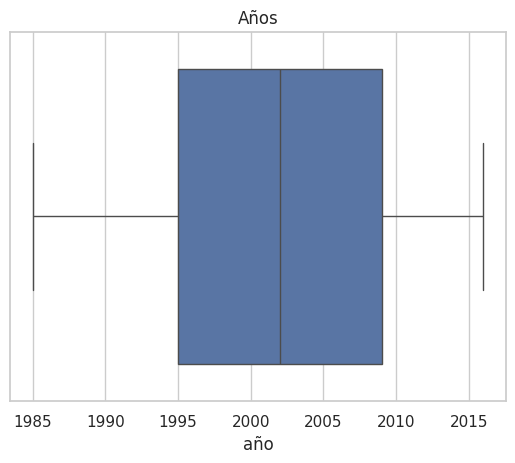

In [63]:
sns.set(style="whitegrid") #Estilo de la grafica
sns.boxplot(x=df['año']) #Ponemos la grafica y escogemos la columna año
plt.title("Años") #Agregamos un titulo

El boxplots de año proporciona una representación visual de la distribución, la mediana y la variabilidad de un conjunto de datos, así como una forma de identificar valores atípicos.

### No. de Suicidios

#### Boxplots

Text(0.5, 1.0, 'No de Suicidios')

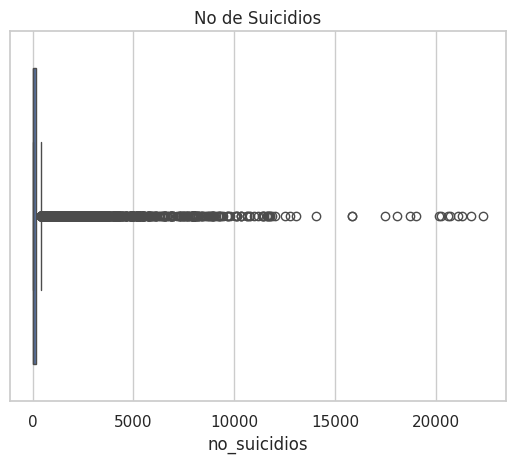

In [64]:
sns.set(style="whitegrid") #Estilo de la grafica
sns.boxplot(x=df['no_suicidios']) #Ponemos la grafica y escogemos la columna no_suicidios
plt.title("No de Suicidios") #Agregamos un titulo

Observamos que tenemos valores atípicos, los cuales nos están estorbando en nuestro análisis. Por lo que proceedemos a eliminarlos usando el Score de Rango Intercuartílico.

In [65]:
#Se calcula el rango intercuartílico:
#que es la diferencia del percentil 75 y percentil 25
iqr = df['no_suicidios'].quantile(0.75) - df['no_suicidios'].quantile(0.25)

#Se hace un filtrado de los datos para eliminar los valores atipicos considerando los limites inferiores y superiores
filtro_inferior = df['no_suicidios'] > df['no_suicidios'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df['no_suicidios'] < df['no_suicidios'].quantile(0.75) + (iqr * 1.5)

df2_filtrado = df[filtro_inferior & filtro_superior]

Text(0.5, 1.0, 'No de Suicidios')

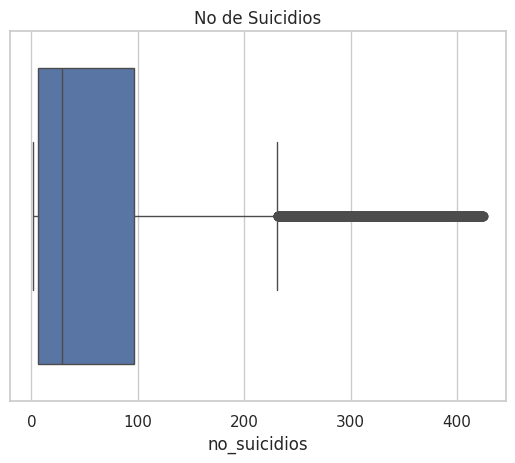

In [66]:
sns.set(style="whitegrid") #Estilo de la grafica
sns.boxplot(x=df2_filtrado['no_suicidios']) #Ponemos la grafica y escogemos la columna no_suicidios
plt.title("No de Suicidios") #Agregamos un titulo

### PIB Per Cápita

#### Boxplots

Text(0.5, 1.0, 'PIB Per Capita')

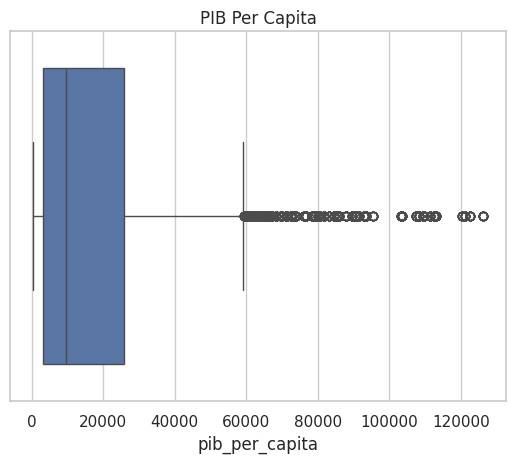

In [67]:
sns.set(style="whitegrid") #Estilo de la grafica
sns.boxplot(x=df['pib_per_capita']) #Ponemos la grafica y escogemos la columna price
plt.title("PIB Per Capita") #Agregamos un titulo

Nuevamente, observamos que tenemos valores atípicos, los cuales nos están estorbando en nuestro análisis. Por lo que proceedemos a eliminarlos usando el Score de Rango Intercuartílico.

In [68]:
#Se calcula el rango intercuartílico:
#que es la diferencia del percentil 75 y percentil 25
iqr = df['pib_per_capita'].quantile(0.75) - df['pib_per_capita'].quantile(0.25)

#Se hace un filtrado de los datos para eliminar los valores atipicos considerando los limites inferiores y superiores
filtro_inferior = df['pib_per_capita'] > df['pib_per_capita'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df['pib_per_capita'] < df['pib_per_capita'].quantile(0.75) + (iqr * 1.5)

df3_filtrado = df[filtro_inferior & filtro_superior]

Text(0.5, 1.0, 'PIB Per Capita')

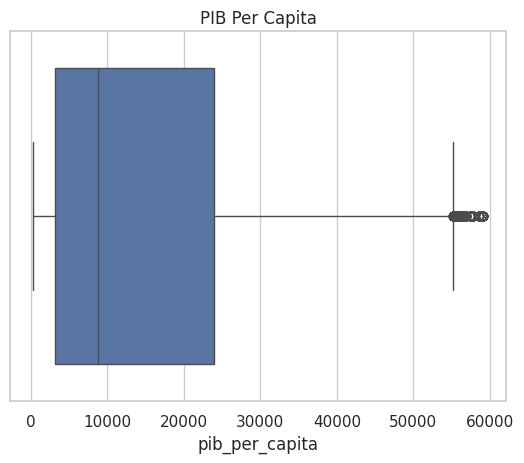

In [69]:
sns.set(style="whitegrid") #Estilo de la grafica
sns.boxplot(x=df3_filtrado['pib_per_capita']) #Ponemos la grafica y escogemos la columna price
plt.title("PIB Per Capita") #Agregamos un titulo

## Exploración de Variables Categóricas y Análisis Multivariable

Para hacer la exploración de variables categóricas y análisis multivariable lo que hacemos es identificar las variables categóricas en nuestro dataset, para eso, utilizamos `dtypes`.

In [70]:
df.dtypes

pais              object
año                int64
sexo              object
edad              object
no_suicidios       int64
pib_per_capita     int64
generacion        object
dtype: object

Nuestras variables categóricas son:
* pais
* sexo
* edad
* generacion

Utilizamos gráficas de barras para ver como se comportan los datos categóricos

### Grafica de barras

#### País

In [71]:
sns.set_style('white')

In [72]:
df['pais'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'El Salvador',
       'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan',
       'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania',
       'Luxembourg', 'Macau', 'Maldives', 'Malta', 'Mauritius', 'Mexico',
       'Mongolia', 'Montenegro', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Philippines',
       'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea',
       'Romania', 'Russian Fede

In [73]:
df['pais'].value_counts()

Netherlands            378
Austria                373
Ecuador                372
Argentina              372
United States          372
                      ... 
Mongolia                10
Antigua and Barbuda     10
Cabo Verde               9
Macau                    9
San Marino               4
Name: pais, Length: 99, dtype: int64

In [74]:
#Calcular la frecuencia de cada valor único
counts = df['pais'].value_counts()
print(counts)

Netherlands            378
Austria                373
Ecuador                372
Argentina              372
United States          372
                      ... 
Mongolia                10
Antigua and Barbuda     10
Cabo Verde               9
Macau                    9
San Marino               4
Name: pais, Length: 99, dtype: int64


Como son muchos países, solamente nos concentraremos en los 20 países que tienen más suicidios

<ipython-input-75-2230a95d3f07>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Country', data=df_top_10, palette='viridis')


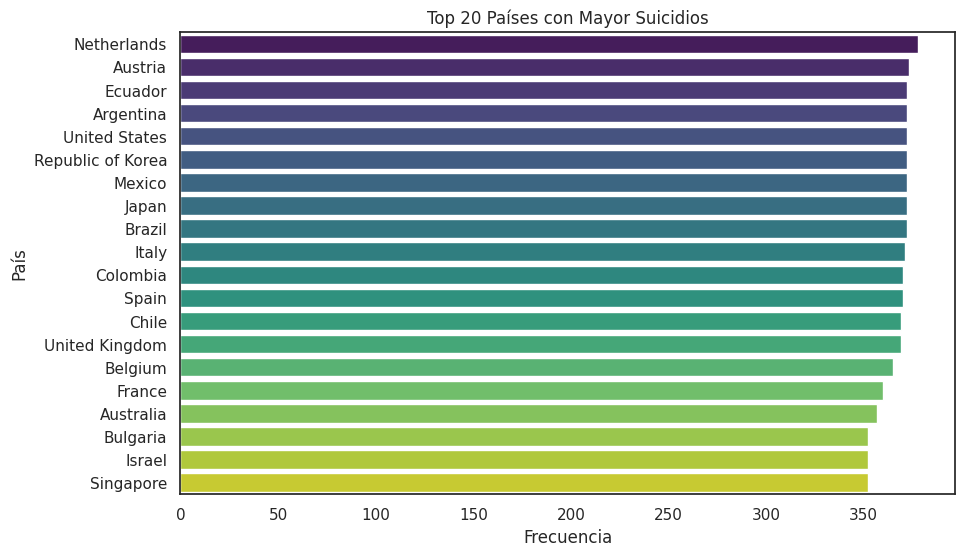

In [75]:
top_10_countries = counts.head(20)

# Crea un DataFrame con los datos necesarios
data = {'Country': top_10_countries.index, 'Frequency': top_10_countries.values}
df_top_10 = pd.DataFrame(data)

# Crea el gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Country', data=df_top_10, palette='viridis')

# Personaliza el gráfico (opcional)
plt.title('Top 20 Países con Mayor Suicidios')
plt.xlabel('Frecuencia')
plt.ylabel('País')

# Muestra el gráfico
plt.show()

Las diferencias en las tasas de suicidio entre países podrían estar influenciadas por una variedad de factores . La gráfica proporcionaría una visión clara de cómo varían las tasas de suicidio entre diferentes países presentados en la base de datos, . Esto permitiría identificar áreas donde las tasas son particularmente altas, resaltando la necesidad de abordar estos problemas.

#### Sexo

In [76]:
sns.set_style('white')

In [77]:
df['sexo'].unique()

array(['M', 'F'], dtype=object)

In [78]:
#Calcular la frecuencia de cada valor único
counts = df['sexo'].value_counts()
print(counts)

M    12286
F    11253
Name: sexo, dtype: int64


In [79]:
#Cambio de conteos a porcentajes
as_percentages = (counts * 100) / counts.sum() #Funcion vectorizada, Funcion de Agregacion.
print(as_percentages)

M    52.194231
F    47.805769
Name: sexo, dtype: float64


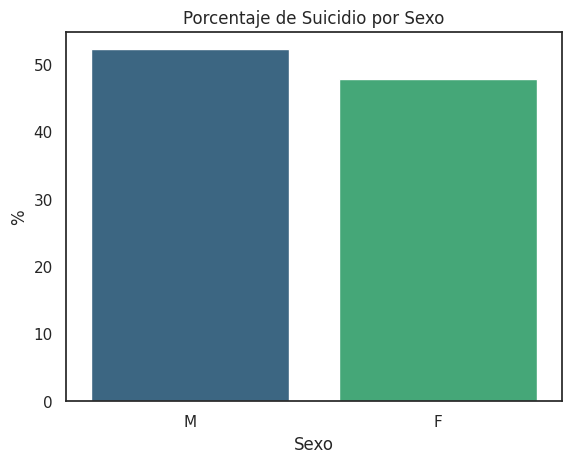

In [80]:
#Crear un gráfico de barras con Seaborn
ax = sns.barplot(x=as_percentages.index, y=as_percentages.values, hue=as_percentages.index, palette='viridis')

#Configurar el título y las etiquetas
ax.set_title('Porcentaje de Suicidio por Sexo')
ax.set(xlabel= "Sexo", ylabel='%')

#Mostrar el gráfico
plt.show()

La gráfica permite visualizar claramente las diferencias en las tasas de suicidio entre hombres y mujeres. Es común encontrar que los hombres tienen tasas de suicidio más altas que las mujeres en muchos países y regiones del mundo,  esto puede variar según el contexto cultural y socioeconómico.

#### Edad

In [81]:
sns.set_style('white')

Identificamos los valores únicos de los datos que tenemos en la columna de edades

In [82]:
df['edad'].unique()

array(['15-24', '35-54', '75+', '25-34', '55-74', '5-14'], dtype=object)

Luego, calculamos la frecuencia de cada valor único de la columna de edades

In [83]:
#Calcular la frecuencia de cada valor único
counts = df['edad'].value_counts()
print(counts)

35-54    4272
25-34    4191
15-24    4131
55-74    4083
75+      3720
5-14     3142
Name: edad, dtype: int64


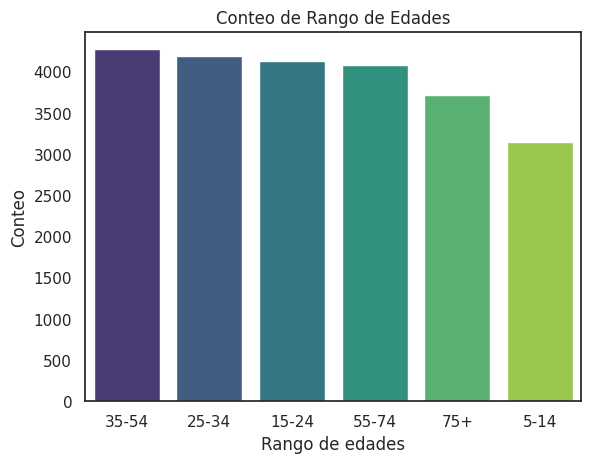

In [84]:
#Crear un gráfico de barras con Seaborn
#ax = sns.barplot(x=counts.index, y=counts.values)
ax = sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette='viridis')
#Configurar el título y las etiquetas
ax.set_title('Conteo de Rango de Edades')
ax.set(xlabel= "Rango de edades", ylabel='Conteo')

# Mostrar el gráfico
plt.show()

La gráfica permite visualizar claramente cómo se distribuyen los suicidios en diferentes grupos de edad. Al observar la distribución de suicidios por rango de edades, se pueden identificar grupos de edad que tienen un mayor riesgo de suicidio, como resultado se presenta el rango de edades entre 35-54 años de edad experimentan una incidencia más alta de suicidios en comparación con otros.

#### Generación

In [85]:
df['generacion'].unique()

array([' X', 'Silent', 'G.I. ', 'Boomers', 'Millenials', ' Z'],
      dtype=object)

In [86]:
#Calcular la frecuencia de cada valor único
counts = df['generacion'].value_counts()
print(counts)

 X            5638
Silent        5382
Millenials    4716
Boomers       4568
G.I.          2251
 Z             984
Name: generacion, dtype: int64


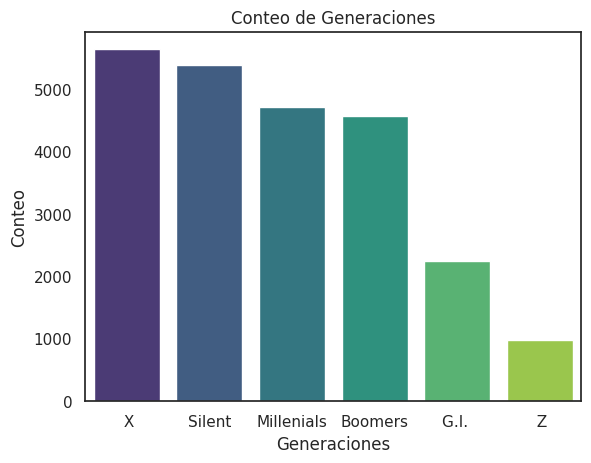

In [87]:
#Crear un gráfico de barras con Seaborn
#ax = sns.barplot(x=counts.index, y=counts.values)
ax = sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette='viridis')

#Configurar el título y las etiquetas
ax.set_title('Conteo de Generaciones')
ax.set(xlabel= "Generaciones", ylabel='Conteo')

#Mostrar el gráfico
plt.show()

La gráfica de conteo por generación ayuda a comprender mejor los factores contextuales y socioculturales asociados con diferentes generaciones que pueden influir en la incidencia de suicidio. La gráfica muestra cómo se distribuyen los suicidios entre diferentes generaciones, ayudando a identificar que la generación x (nacidos entre 1965 y 1981)  tienen una incidencia más alta de suicidios en comparación con otras.

Tomando en cuenta nuestras variables categóricas, las combinaciones darían información sería:
* sexo - rango de edades
* sexo - generación
* rango de edades - generación

Para esto, se van a realizar tablas de contingencia y múltiples gráficas

#### Sexo - Rango de edades

In [88]:
crosstab_sexo_edades = pd.crosstab(df['sexo'], df['edad'], margins=False)

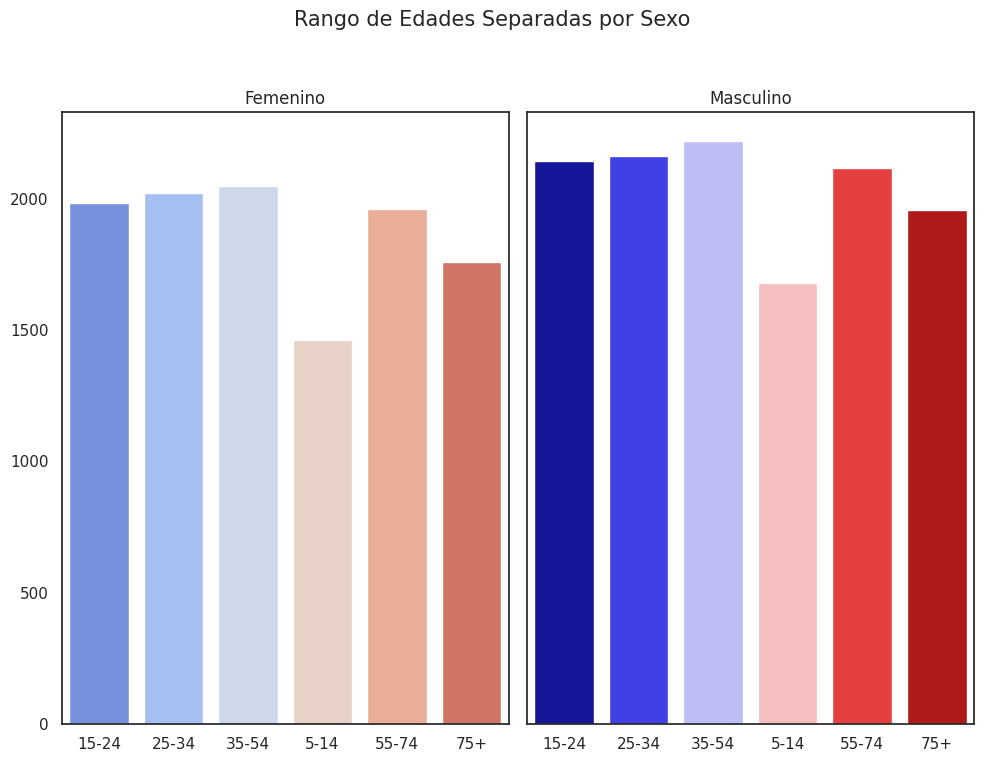

In [89]:
fig, axes=  plt.subplots(1,2, figsize=(10, 8), sharex=True, sharey=True)

sns.barplot(x=crosstab_sexo_edades.columns, y=crosstab_sexo_edades.loc['F'], ax=axes[0], hue=crosstab_sexo_edades.columns, palette="coolwarm", legend=False)
sns.barplot(x=crosstab_sexo_edades.columns, y=crosstab_sexo_edades.loc['M'], ax=axes[1], hue=crosstab_sexo_edades.columns, palette="seismic", legend=False)

axes[0].set(xlabel='', ylabel='', title='Femenino')
axes[1].set(xlabel='', ylabel='', title='Masculino')

fig.suptitle('Rango de Edades Separadas por Sexo', fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  #Ajustar el layout para acomodar el título superior, tuple (left, bottom, right, top), default: (0, 0, 1, 1)


Al observar la distribución de suicidios por rango de edades y separada por género mediante una grafica ayuda a identificar grupos de edad y género que tienen un mayor riesgo de suicidio. Como resultado en entre el género femenino se muestra las edades de 35-54 años de edad, seguido de los 25 -34 esta información es crucial. En el genero masculino se presenta 35-54 años de edad seguido 25 -34. Años similar al del genero femenino.

#### Sexo - Generación

In [90]:
crosstab_sexo_generacion = pd.crosstab(df['sexo'], df['generacion'],margins=False)

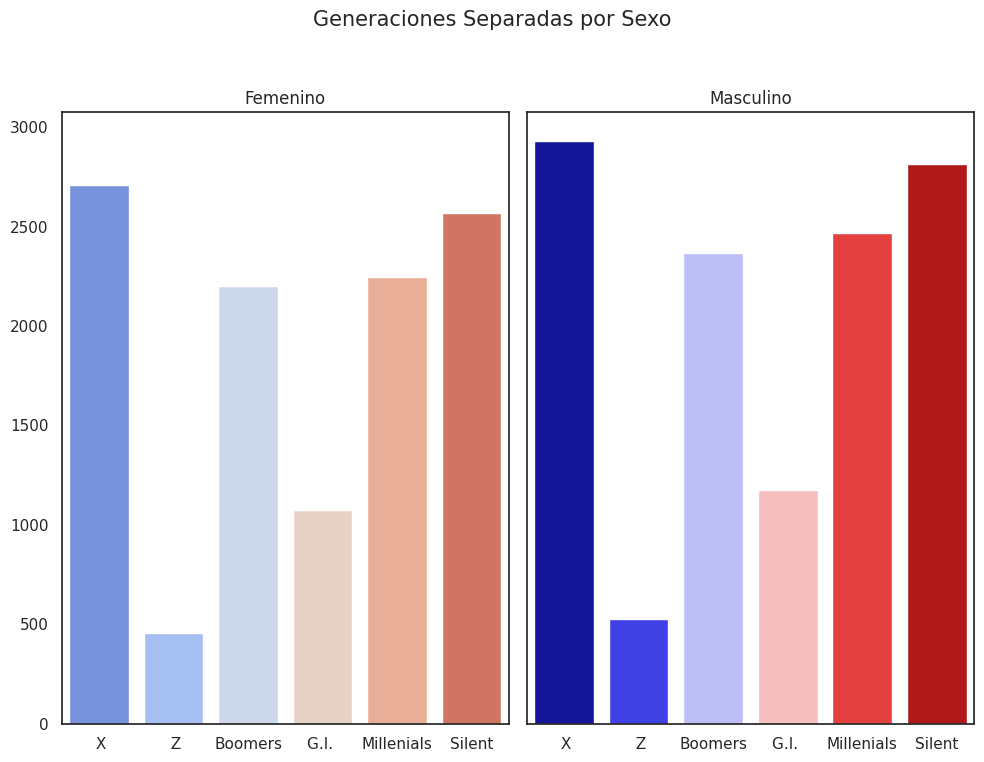

In [91]:
fig, axes=  plt.subplots(1,2, figsize=(10, 8), sharex=True, sharey=True)

sns.barplot(x=crosstab_sexo_generacion.columns, y=crosstab_sexo_generacion.loc['F'], ax=axes[0], hue=crosstab_sexo_generacion.columns, palette="coolwarm", legend=False)
sns.barplot(x=crosstab_sexo_generacion.columns, y=crosstab_sexo_generacion.loc['M'], ax=axes[1], hue=crosstab_sexo_generacion.columns, palette="seismic", legend=False)

axes[0].set(xlabel='', ylabel='', title='Femenino')
axes[1].set(xlabel='', ylabel='', title='Masculino')

fig.suptitle('Generaciones Separadas por Sexo', fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  #Ajustar el layout para acomodar el título superior, tuple (left, bottom, right, top), default: (0, 0, 1, 1)


la distribución en la gráfica de suicidios por generaciones separadas  por sexo, ayuda a identificar entre el género y los grupos de generación X que tienen un mayor riesgo de suicidio. Corravorando los mismo resultados de la grafica de generación individual, tanto para hombres como mujeres

#### Rango de edades - Generación

In [92]:
#Podemos obtener una columna y una fila con los totales añadiendo la bandera margins y margins_name:
crosstab = pd.crosstab(df['edad'], df['generacion'],margins=False)
crosstab

generacion,X,Z,Boomers,G.I.,Millenials,Silent
edad,,,,,,
15-24,1891,0,0,0,2240,0
25-34,2414,0,1041,0,736,0
35-54,915,0,2796,0,0,561
5-14,418,984,0,0,1740,0
55-74,0,0,731,532,0,2820
75+,0,0,0,1719,0,2001


In [93]:
sns.set_style('whitegrid')

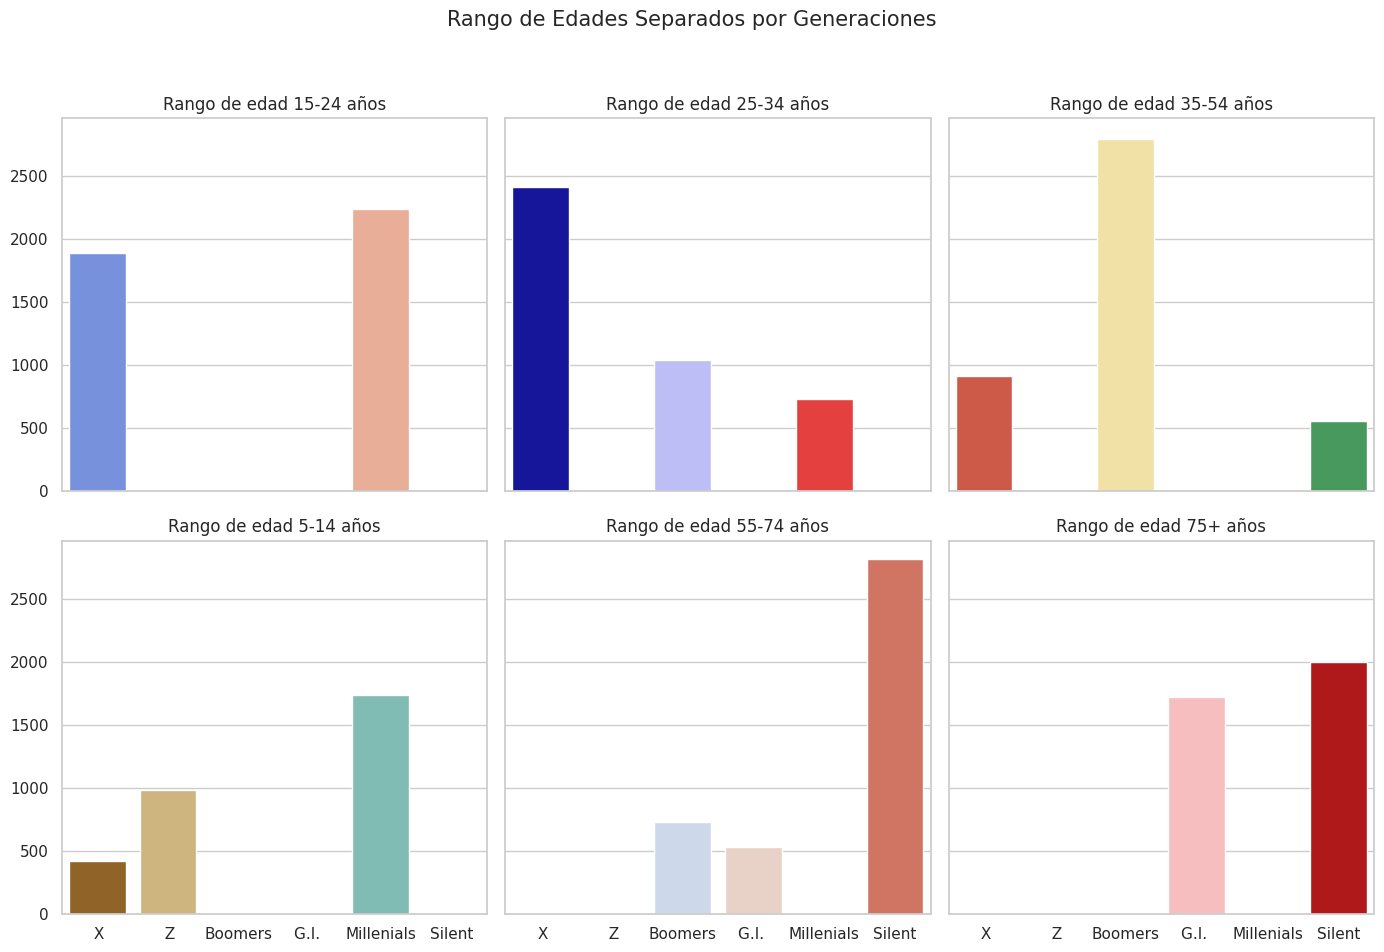

In [94]:
fig, axes=  plt.subplots(2,3, figsize=(14, 10), sharex=True, sharey=True)

sns.barplot(x=crosstab.columns, y=crosstab.loc['15-24'], ax=axes[0, 0], hue=crosstab.columns, palette="coolwarm", legend=False)
sns.barplot(x=crosstab.columns, y=crosstab.loc['25-34'], ax=axes[0, 1], hue=crosstab.columns, palette="seismic", legend=False)
sns.barplot(x=crosstab.columns, y=crosstab.loc['35-54'], ax=axes[0, 2], hue=crosstab.columns, palette="RdYlGn", legend=False)
sns.barplot(x=crosstab.columns, y=crosstab.loc['5-14'], ax=axes[1, 0], hue=crosstab.columns, palette="BrBG", legend=False)
sns.barplot(x=crosstab.columns, y=crosstab.loc['55-74'], ax=axes[1, 1], hue=crosstab.columns, palette="coolwarm", legend=False)
sns.barplot(x=crosstab.columns, y=crosstab.loc['75+'], ax=axes[1, 2], hue=crosstab.columns, palette="seismic", legend=False)

axes[0, 0].set(xlabel='', ylabel='', title='Rango de edad 15-24 años')
axes[0, 1].set(xlabel='', ylabel='', title='Rango de edad 25-34 años')
axes[0, 2].set(xlabel='', ylabel='', title='Rango de edad 35-54 años')
axes[1, 0].set(xlabel='', ylabel='', title='Rango de edad 5-14 años')
axes[1, 1].set(xlabel='', ylabel='', title='Rango de edad 55-74 años')
axes[1, 2].set(xlabel='', ylabel='', title='Rango de edad 75+ años')

fig.suptitle('Rango de Edades Separados por Generaciones', fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar el layout para acomodar el título superior, tuple (left, bottom, right, top), default: (0, 0, 1, 1)


Esto  resaltar las generaciones específicas o grupos de edad donde las tasas de suicidio son más altas o más bajas.

Ahora, nos preguntamos, ¿qué combinaciones de una variable numérica con una variable categórica podrían ser interesantes?

* pais - pib_per_capita
* no_suicidios - sexo
* no_suicidios - rango de edades


Realizaremos boxplots y violinplots para ello:  tanto los boxplots como los violinplots son herramientas valiosas  para visualizar y comparar la distribución de los datos.

In [95]:
by_suicidios = df.groupby(level=0)[['año', 'no_suicidios', 'pib_per_capita']].mean()
sexo = df.groupby(level=0)['sexo'].last()
merged = by_suicidios.merge(sexo, left_index=True, right_index=True)

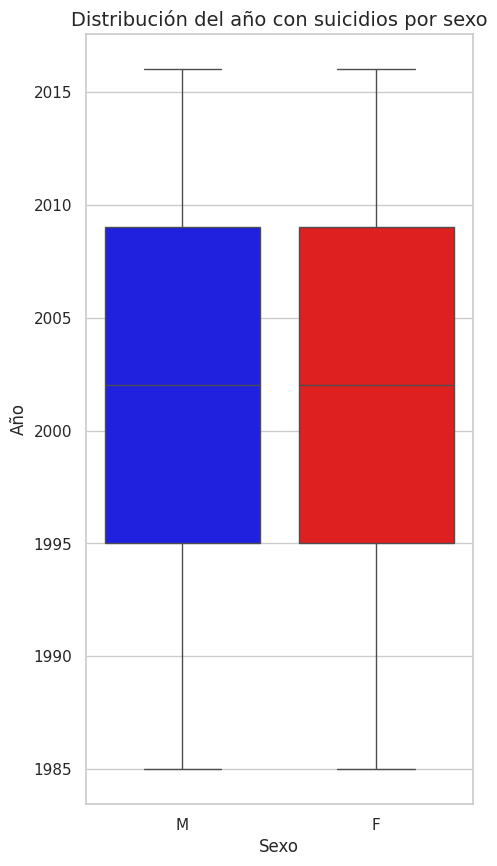

In [96]:
plt.figure(figsize=(5, 10))
#Crea el boxplot con Seaborn y asigna colores
sns.boxplot(data=merged, x='sexo', y='año', hue='sexo', palette=['blue', 'red'], dodge=False)

#Omitir la leyenda si no es necesaria
plt.legend([],[], frameon=False)

#Añade un título principal al gráfico
plt.title('Distribución del año con suicidios por sexo', fontsize=14)

#Añade títulos a los ejes X e Y
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Año', fontsize=12)

plt.show()

boxplots presenta los valores atípicos y comparar medianas y rangos intercuartílicos entre grupos. mediante la distribuicion de los años y la categoria de genero.

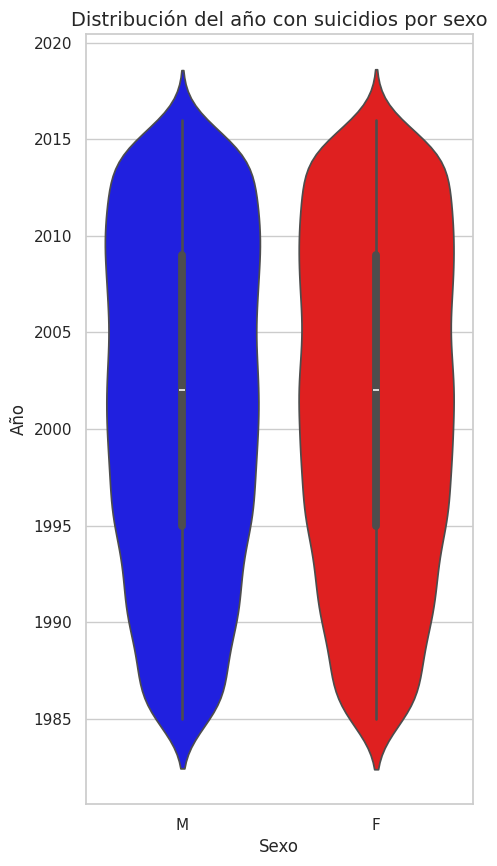

In [97]:
plt.figure(figsize=(5, 10))
#Crea el boxplot con Seaborn y asigna colores
sns.violinplot(data=merged, x='sexo', y='año', hue='sexo', palette=['blue', 'red'], dodge=False)

#Omitir la leyenda si no es necesaria
plt.legend([],[], frameon=False)

#Añade un título principal al gráfico
plt.title('Distribución del año con suicidios por sexo', fontsize=14)

#Añade títulos a los ejes X e Y
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Año', fontsize=12)

plt.show()

El violinplot visualizar la densidad de probabilidad y la forma de la distribución de los datos entre los mismos datos de año y el genero.

In [98]:
by_suicidios = df.groupby(level=0)[['año', 'no_suicidios', 'pib_per_capita']].mean()
edad = df.groupby(level=0)['edad'].last()
merged = by_suicidios.merge(edad, left_index=True, right_index=True)

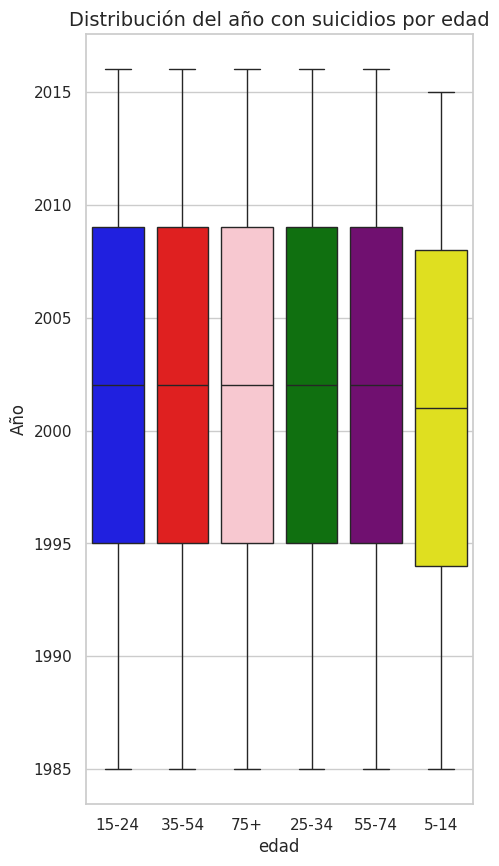

In [99]:
plt.figure(figsize=(5, 10))
#Crea el boxplot con Seaborn y asigna colores
sns.boxplot(data=merged, x='edad', y='año', hue='edad', palette=['blue', 'red', 'pink', 'green', 'purple', 'yellow'], dodge=False)

#Omitir la leyenda si no es necesaria
plt.legend([],[], frameon=False)

#Añade un título principal al gráfico
plt.title('Distribución del año con suicidios por edad', fontsize=14)

#Añade títulos a los ejes X e Y
plt.xlabel('edad', fontsize=12)
plt.ylabel('Año', fontsize=12)

plt.show()

boxplot presenta los valores atípicos y comparar medianas y rangos intercuartílicos entre los años y los rango de edades.

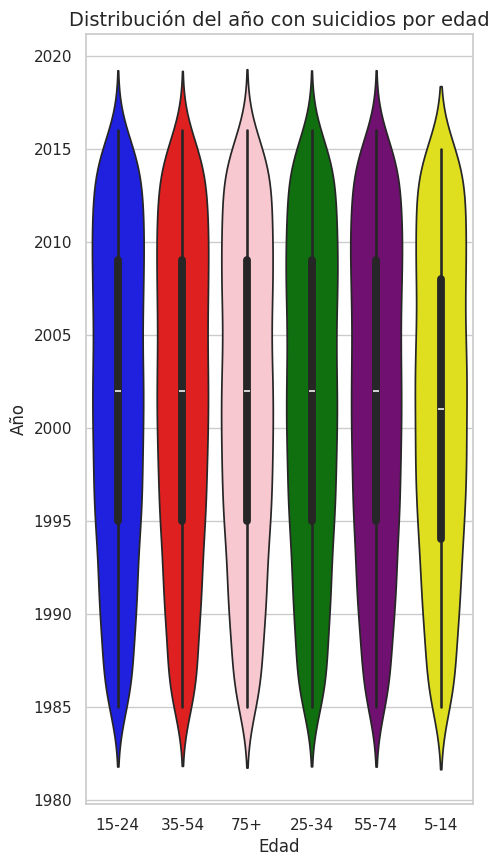

In [100]:
plt.figure(figsize=(5, 10))
#Crea el boxplot con Seaborn y asigna colores
sns.violinplot(data=merged, x='edad', y='año', hue='edad', palette=['blue', 'red', 'pink', 'green', 'purple', 'yellow'], dodge=False)

#Omitir la leyenda si no es necesaria
plt.legend([],[], frameon=False)

#Añade un título principal al gráfico
plt.title('Distribución del año con suicidios por edad', fontsize=14)

#Añade títulos a los ejes X e Y
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Año', fontsize=12)

plt.show()

El violinplot visualizar la densidad de probabilidad y la forma de la distribución de los datos entre el año con la edad

In [101]:
by_suicidios = df.groupby(level=0)[['año', 'no_suicidios', 'pib_per_capita']].mean()
generacion = df.groupby(level=0)['generacion'].last()
merged = by_suicidios.merge(generacion, left_index=True, right_index=True)

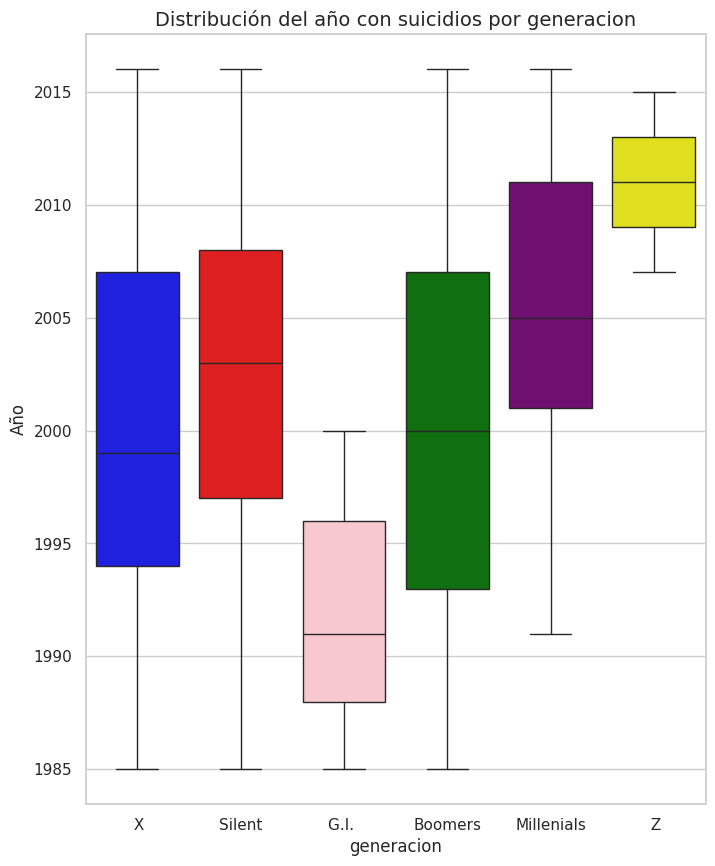

In [102]:
plt.figure(figsize=(8, 10))
#Crea el boxplot con Seaborn y asigna colores
sns.boxplot(data=merged, x='generacion', y='año', hue='generacion', palette=['blue', 'red', 'pink', 'green', 'purple', 'yellow'], dodge=False)

#Omitir la leyenda si no es necesaria
plt.legend([],[], frameon=False)

#Añade un título principal al gráfico
plt.title('Distribución del año con suicidios por generacion', fontsize=14)

#Añade títulos a los ejes X e Y
plt.xlabel('generacion', fontsize=12)
plt.ylabel('Año', fontsize=12)

plt.show()

boxplot presenta los valores atípicos y comparar medianas y rangos intercuartílicos entre los años y las generaciones.

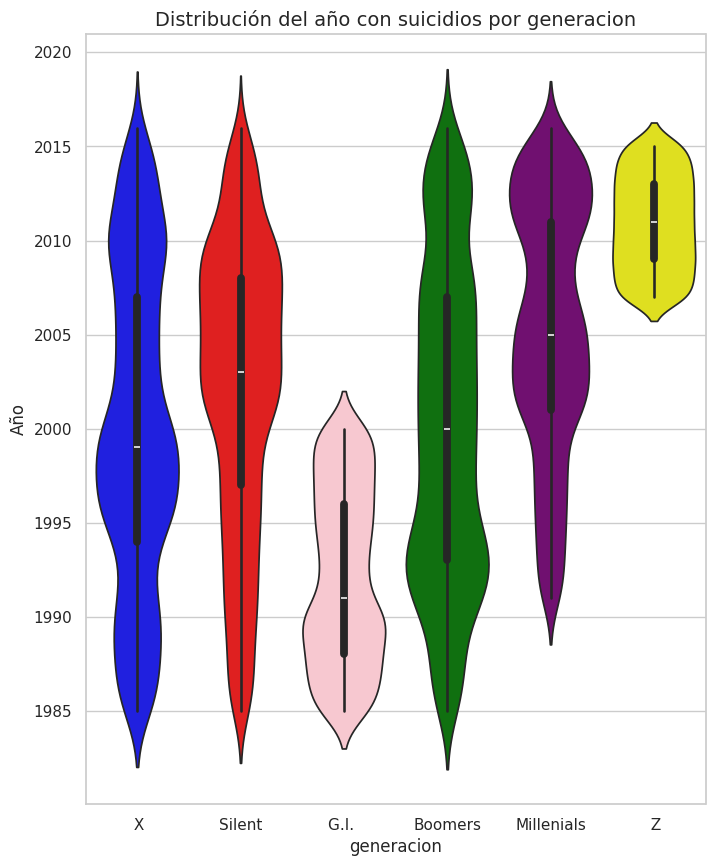

In [103]:
plt.figure(figsize=(8, 10))
#Crea el violinplot con Seaborn y asigna colores
sns.violinplot(data=merged, x='generacion', y='año', hue='generacion', palette=['blue', 'red', 'pink', 'green', 'purple', 'yellow'], dodge=False)

#Omitir la leyenda si no es necesaria
plt.legend([],[], frameon=False)

#Añade un título principal al gráfico
plt.title('Distribución del año con suicidios por generacion', fontsize=14)

#Añade títulos a los ejes X e Y
plt.xlabel('generacion', fontsize=12)
plt.ylabel('Año', fontsize=12)

plt.show()

EL violinplot visualizar la densidad de probabilidad y la forma de la distribución de los datos entre los años con la generacion.

## Correlaciones y Regresión Linear Simple

* Identifica cuáles son las variables numéricas en tu dataset.
* Asegúrate de que tengan el tipo de dato correcto y que no haya NaNs por ahí escondidos.
* Genera una matriz de correlaciones y un pairplot para visualizar de manera general las relaciones entre tus variables numéricas.
* Utilizando gráficas de dispersión y tus medidas de locación y dispersión, identifica dónde hay valores atípicos y decide qué hacer con ellos.
* Revisa si tu revisión de valores atípicos cambió de alguna manera las relaciones existentes.
* Donde consideres necesario, entrena modelos de Regresión Lineal con un o más pares de variables. Incluso si no te parece que realizar predicciones entre pares de variables tiene sentido para tu proyecto, prueba realizar un par de regresiones para que practiques el procedimiento.

Las variables numéricas de nuestro dataset son:
* año
* no_suicidios
* pib_per_capita

Con estas tres variables vamos a generar nuestra matriz de correlación para visualizar la relación que existe entre ellas:

In [104]:
#Creamos la matríz de correlación
df.corr()

<ipython-input-104-189f9d9349e5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,año,no_suicidios,pib_per_capita
año,1.000000,-0.006088,0.336281
no_suicidios,-0.006088,1.000000,0.060750
pib_per_capita,0.336281,0.060750,1.000000


Para mejorar la visualización de nuestra matriz de correlación, creamos un mapa de color:

<ipython-input-105-738a1bf45454>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);


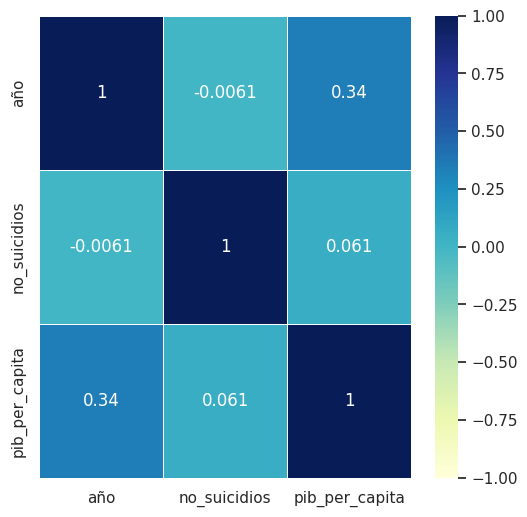

In [105]:
#Creamos un mapa de color para mejorar la visualización
plt.figure(figsize=(6, 6))
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

Como nuestra matriz de correlación tiene una mitad 'superior' y una mitad 'inferior' con los mismos valores, ocultamos la mitad superior ya que los valores son redundantes, así como la correlación entre la propia variable ya que esta es siempre igual a la unidad.

In [106]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
mask

<ipython-input-106-be371d7477a5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=bool))


array([[ True,  True,  True],
       [False,  True,  True],
       [False, False,  True]])

<ipython-input-107-153225634d53>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5)


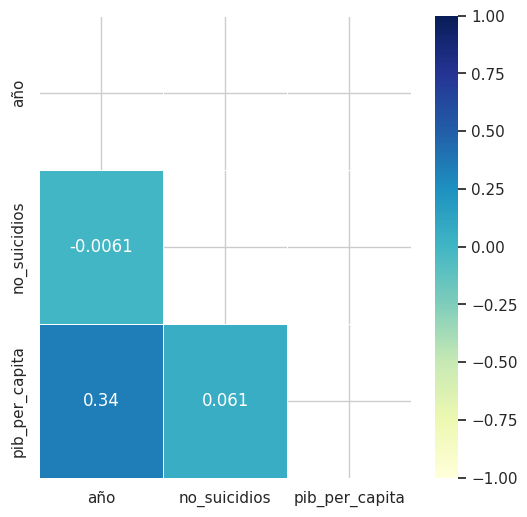

In [107]:
plt.figure(figsize=(6, 6))
ax = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5)
plt.show()

Adicionalmente, para ayudarnos con la visualización de la relación que existe entre nuestras variables numéricas, creamos también un pairplot de estas mismas:

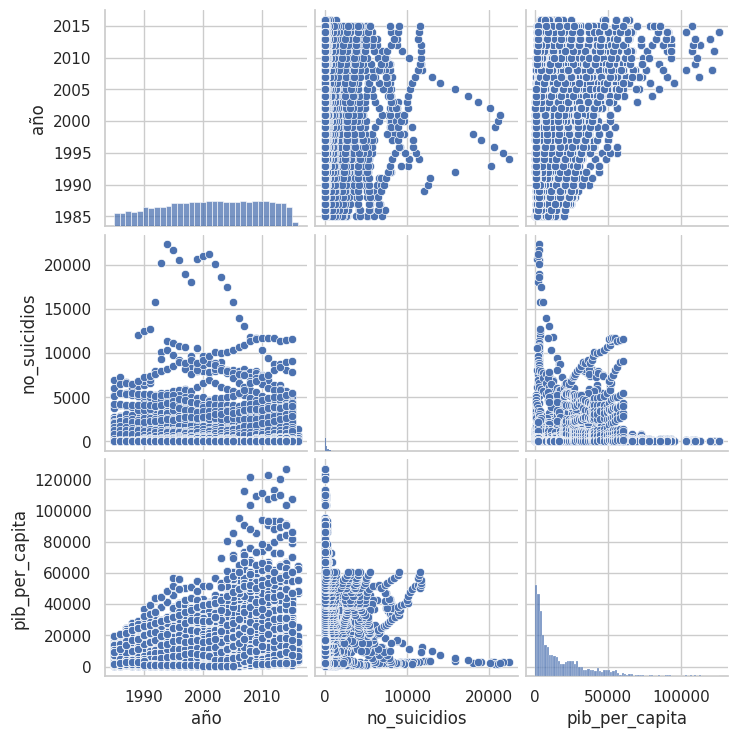

In [108]:
#Creamos un pairplot
sns.pairplot(df);

A partir de la matriz de correlación y del pairplot, observamos que las variables que mayor correlación tienen son "año" y "pib_per_capita".
Tomamos estas dos variables y creamos una gráfica de dispersión:

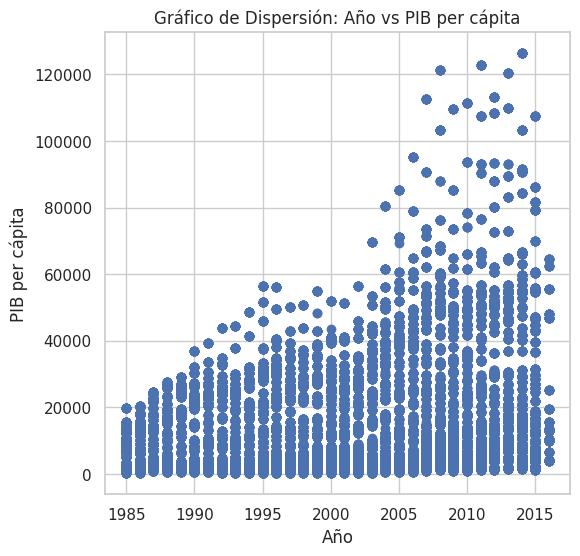

In [109]:
#Creación de gráficas de dispersión de las variables numéricas a partir del comportamiento observado en el pairplot
plt.figure(figsize=(6, 6))
plt.scatter(df['año'], df['pib_per_capita'])
plt.xlabel('Año')
plt.ylabel('PIB per cápita')
plt.title('Gráfico de Dispersión: Año vs PIB per cápita')
plt.grid(True)
plt.show()

Obtenemos nuevamente la correlación existente entre estas dos variables:

In [110]:
df['año'].corr(df['pib_per_capita'])

0.3362805083103062

Ahora, entrenemos un modelo de regresión lineal para este par de variables ya que fueron las que mostraron mayor correlación entre sí:

In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
#Entrenamiento del modelo de regresión lineal
lr= LinearRegression()

lr.fit(df['año'].to_frame(), df['pib_per_capita'])

LinearRegression()

In [113]:
y_predict = lr.predict(df['año'].to_frame())

Obtenemos nuestra gráfica con la predicción que corresponde a la línea roja:

<Axes: xlabel='año', ylabel='pib_per_capita'>

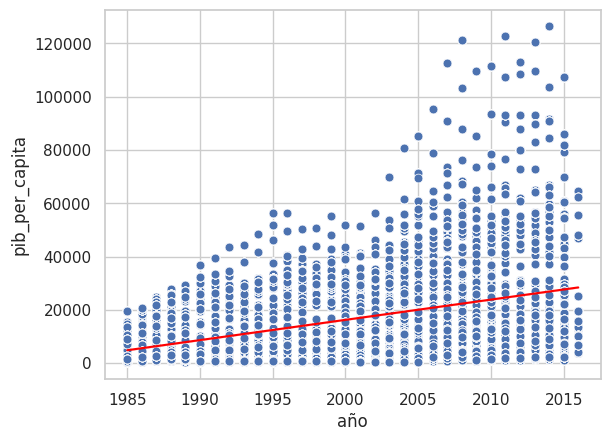

In [114]:
sns.scatterplot(x=df['año'], y=df['pib_per_capita'], s=40)
sns.lineplot(x=df['año'], y=y_predict, color='#FF0000')

Y extraemos la ecuación correspondiente a la línea roja de nuestro modelo:

In [115]:
intercept = lr.intercept_
coefficient = lr.coef_[0]

Finalmente, nuestra función predictiva es:

In [116]:
print(f'y = {coefficient} * x + {intercept}')

y = 759.8347596353707 * x + -1503420.1135107414


In [117]:
print(f'R2: {lr.score(df["año"].to_frame(), df["pib_per_capita"])}')

R2: 0.1130845802694379
